In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
print('zeus version:', zeus.__version__)
import time

zeus version: 0.9.2


In [4]:
def slow():
    s = 0
    for i in range(200000):
        s+=i

In [ ]:
%timeit slow()

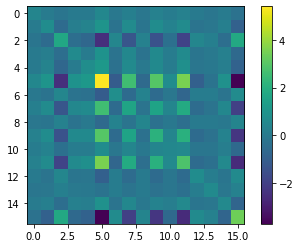

In [5]:
ndim = 16
nwalkers = 2*ndim
nsteps= 1000

C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    slow()
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

start = np.random.rand(ndim)

In [6]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov],parallel=True)
sampler.run(start, nsteps)

31/10/2019 03:38:46 PM: INFO    : Parallelizing ensemble of walkers using 4 CPUs...
31/10/2019 03:38:46 PM: INFO    : Starting sampling...

  2%|▏         | 15/1000 [00:07<08:29,  1.93it/s]Process ForkPoolWorker-126:
Process ForkPoolWorker-125:
Process ForkPoolWorker-127:
Process ForkPoolWorker-128:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/minas/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minas/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minas/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minas/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minas/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(

KeyboardInterrupt: 

In [ ]:
sampler.run(start, nsteps)

31/10/2019 03:39:00 PM: INFO    : Parallelizing ensemble of walkers using 4 CPUs...
31/10/2019 03:39:00 PM: INFO    : Continuing sampling...


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<07:40,  2.17it/s]

  0%|          | 2/1000 [00:00<07:41,  2.16it/s]

  0%|          | 3/1000 [00:01<07:41,  2.16it/s]

  0%|          | 4/1000 [00:01<07:41,  2.16it/s]

In [ ]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten()
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)